In [70]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from numpy import array
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import KFold

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

features_df = pd.read_csv("./human+activity+recognition+using+smartphones/UCI HAR Dataset/features.txt",
                          sep="\s+", header=None, names=["column_index", "column_name"])

features_df.head()

,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


In [40]:
feature_names = features_df["column_name"].values.tolist()

In [41]:
import pandas as pd

# 파일 경로 설정
path = "./human+activity+recognition+using+smartphones/UCI HAR Dataset/"

# 특징 파일 불러오기
X_train = pd.read_csv(path+"train/X_train.txt", sep="\s+", header=None)
X_test = pd.read_csv(path+"test/X_test.txt", sep="\s+", header=None)

# 각 특징에 대한 열 이름 추가
X_train.columns = feature_names
X_test.columns = feature_names

# X_train과 X_test를 데이터프레임으로 만들어주기
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)


In [42]:
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [44]:
type(X_train)

pandas.core.frame.DataFrame

In [45]:
# 레이블 파일 불러오기
y_train = pd.read_csv(path+"train/y_train.txt", sep="\s+", header=None, names=["activity"])
y_test = pd.read_csv(path+"test/y_test.txt", sep="\s+", header=None, names=["activity"])

# 클래스 레이블을 0부터 시작하도록 조정
y_train = y_train - 1
y_test = y_test - 1


In [46]:
type(y_train)

pandas.core.frame.DataFrame

In [48]:
# 훈련 데이터 생성
train_data = pd.concat([X_train, y_train], axis=1)

# 테스트 데이터 생성
test_data = pd.concat([X_test, y_test], axis=1)


In [49]:
train_data.shape

(7352, 562)

In [50]:
train_data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,4
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,4
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,4
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,4
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,4


In [51]:
test_data.shape

(2947, 562)

In [53]:
X_train.shape[0], X_train.shape[1], 1

(7352, 561, 1)

In [52]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

# 데이터 전처리: 특징과 레이블 분리
X_train, y_train = train_data.iloc[:, :-1].values, train_data.iloc[:, -1].values
X_test, y_test = test_data.iloc[:, :-1].values, test_data.iloc[:, -1].values

# 데이터 차원 조정 (CNN은 3D 형태의 입력을 기대함)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# 모델 생성
model = models.Sequential()
model.add(layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(64, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling1D(2))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))  # 예제에서는 6가지 동작을 분류하는 것으로 가정

# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# 모델 평가
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc * 100:.2f}%')


Epoch 1/10
230/230 [==============================] - 5s 19ms/step - loss: 0.3547 - accuracy: 0.8599 - val_loss: 0.1852 - val_accuracy: 0.9328
Epoch 2/10
230/230 [==============================] - 5s 20ms/step - loss: 0.0933 - accuracy: 0.9663 - val_loss: 0.2079 - val_accuracy: 0.9172
Epoch 3/10
230/230 [==============================] - 5s 21ms/step - loss: 0.0597 - accuracy: 0.9793 - val_loss: 0.2011 - val_accuracy: 0.9264
Epoch 4/10
230/230 [==============================] - 5s 22ms/step - loss: 0.0508 - accuracy: 0.9801 - val_loss: 0.1375 - val_accuracy: 0.9484
Epoch 5/10
230/230 [==============================] - 5s 22ms/step - loss: 0.0420 - accuracy: 0.9861 - val_loss: 0.1105 - val_accuracy: 0.9583
Epoch 6/10
230/230 [==============================] - 6s 26ms/step - loss: 0.0315 - accuracy: 0.9898 - val_loss: 0.1124 - val_accuracy: 0.9603
Epoch 7/10
230/230 [==============================] - 6s 25ms/step - loss: 0.0280 - accuracy: 0.9908 - val_loss: 0.1005 - val_accuracy: 0.9661

In [110]:
from sklearn.preprocessing import StandardScaler
# 특징 파일 불러오기
X_train = pd.read_csv(path+"train/X_train.txt", sep="\s+", header=None)
X_test = pd.read_csv(path+"test/X_test.txt", sep="\s+", header=None)

# 각 특징에 대한 열 이름 추가
X_train.columns = feature_names
X_test.columns = feature_names

# X_train과 X_test를 데이터프레임으로 만들어주기
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

# 레이블 파일 불러오기
y_train = pd.read_csv(path+"train/y_train.txt", sep="\s+", header=None, names=["activity"])
y_test = pd.read_csv(path+"test/y_test.txt", sep="\s+", header=None, names=["activity"])

# 클래스 레이블을 0부터 시작하도록 조정
y_train = y_train - 1
y_test = y_test - 1

# 훈련 데이터 생성
train_data = pd.concat([X_train, y_train], axis=1)

# 테스트 데이터 생성
test_data = pd.concat([X_test, y_test], axis=1)

In [111]:
y_train.head()

,activity
0,4
1,4
2,4
3,4
4,4


In [112]:
y = y_train['activity']
# Scale full set of predictors
X_scaled = StandardScaler().fit_transform(X_train)

In [113]:
y_train = y_train['activity'].reset_index(drop=True)
y_test = y_test['activity'].reset_index(drop=True)

In [114]:
X_train.shape

(7352, 561)

In [115]:
y_train.shape

(7352,)

In [116]:
# Scale train/ test predictors based on training data
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [117]:
from sklearn.model_selection import train_test_split
# Create train and test sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1,stratify=  y_train)

In [118]:
# Reformat the training data into sequence samples
# Source: https://machinelearningmastery.com/how-to-develop-convolutional-neural-network-models-for-time-series-forecasting/
from numpy import array
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)



In [119]:
# Merge train and test X/y data to apply sequence transformation function
y_train_array = np.array(y_train)
train_set = np.c_[X_train, y_train_array]

y_test_array = np.array(y_test)
test_set = np.c_[X_test, y_test_array]

y_val_array = np.array(y_val)
val_set = np.c_[X_val, y_val_array]


# Apply sequence transformation using time step of 25 for both train and test data
# All sensing modalities are recorded at a sampling rate of 50 Hz, which is considered sufficient for capturing human activity.

X_train, y_train = split_sequences(train_set, 30)
print(X_train.shape, y_train.shape)

X_test, y_test = split_sequences(test_set, 30)
print(X_test.shape, y_test.shape)

X_val, y_val = split_sequences(val_set, 30)
print(X_val.shape, y_val.shape)

(5485, 30, 561) (5485,)
(2918, 30, 561) (2918,)
(1809, 30, 561) (1809,)


In [120]:
# Convert output variables to categorical for CNN
y_train = to_categorical(y_train)
print(y_train.shape)

y_test = to_categorical(y_test)
print(y_test.shape)

y_val = to_categorical(y_val)
print(y_val.shape)

(5485, 6)
(2918, 6)
(1809, 6)


In [121]:
# Produce variables for CNN input/output shape
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]
print(n_timesteps, n_features, n_outputs)

30 561 6


In [122]:
# Model 1
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
#model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 28, 64)            107776    
                                                                 
 flatten_4 (Flatten)         (None, 1792)              0         
                                                                 
 dense_8 (Dense)             (None, 128)               229504    
                                                                 
 dense_9 (Dense)             (None, 6)                 774       
                                                                 
Total params: 338,054
Trainable params: 338,054
Non-trainable params: 0
_________________________________________________________________


In [123]:
# validation_split = 0.1
train_epochs = 10
history = model.fit(X_train, y_train, epochs=train_epochs, verbose=True,  validation_data = (X_val, y_val))

Epoch 1/10
172/172 [==============================] - 3s 11ms/step - loss: 1.0947 - accuracy: 0.5209 - val_loss: 0.4967 - val_accuracy: 0.7828
Epoch 2/10
172/172 [==============================] - 2s 10ms/step - loss: 0.3224 - accuracy: 0.8689 - val_loss: 0.3412 - val_accuracy: 0.8496
Epoch 3/10
172/172 [==============================] - 2s 9ms/step - loss: 0.1605 - accuracy: 0.9398 - val_loss: 0.2592 - val_accuracy: 0.8999
Epoch 4/10
172/172 [==============================] - 2s 10ms/step - loss: 0.1059 - accuracy: 0.9608 - val_loss: 0.3706 - val_accuracy: 0.8767
Epoch 5/10
172/172 [==============================] - 2s 12ms/step - loss: 0.0777 - accuracy: 0.9706 - val_loss: 0.3968 - val_accuracy: 0.8673
Epoch 6/10
172/172 [==============================] - 2s 11ms/step - loss: 0.0734 - accuracy: 0.9716 - val_loss: 0.3312 - val_accuracy: 0.8922
Epoch 7/10
172/172 [==============================] - 1s 9ms/step - loss: 0.0781 - accuracy: 0.9716 - val_loss: 0.2724 - val_accuracy: 0.9193
E

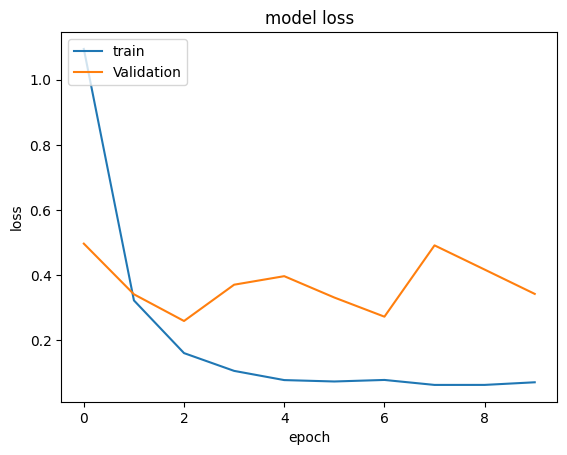

In [124]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

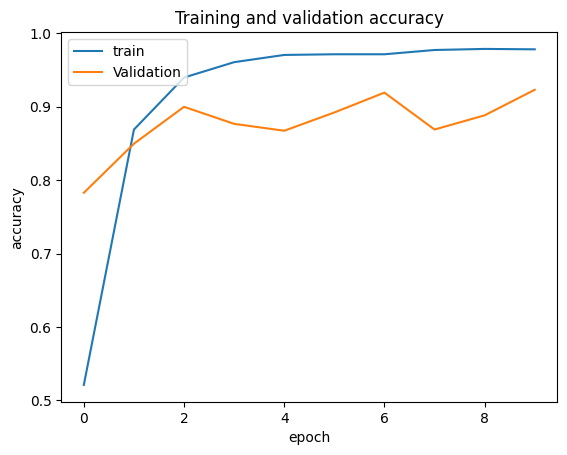

In [125]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

In [126]:
# 모델 평가
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

92/92 [==============================] - 0s 4ms/step - loss: 0.3777 - accuracy: 0.9013
Test Accuracy: 90.13%


In [127]:
# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)
y_pred = y_pred.reshape(-1,1)
y_pred.shape

92/92 [==============================] - 0s 3ms/step


(2918, 1)

In [128]:
y

0       4
1       4
2       4
3       4
4       4
       ..
7347    1
7348    1
7349    1
7350    1
7351    1
Name: activity, Length: 7352, dtype: int64

In [129]:
# Transform full data set for use in cross-validation
# Merge X/y data to apply sequence transformation function
y_array = np.array(y)
full_set = np.c_[X_scaled, y_array]

# Apply sequence transformation using time step of 25 for both train and test data
X_seq, y_seq = split_sequences(full_set, 25)
print(X_seq.shape, y_seq.shape)

(7328, 25, 561) (7328,)


In [130]:
# Results summarizer function (scores, confusion matrix) for classification results
def results_summarizer(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro')
    rec = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    activity_map = {
        0: 'WALKING',
        1: 'WALKING_UPSTAIRS',
        2: 'WALKING_DOWNSTAIRS',
        3: 'SITTING',
        4: 'STANDING',
        5: 'LAYING',
    }
    plt.figure(figsize=(14, 12))

    sns.heatmap(cm,
                annot=True,
                cmap='Blues',
                xticklabels=activity_map.values(),
                yticklabels=activity_map.values()
               )

    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Activity')
    plt.ylabel('Actual Activity')
    plt.show()

    print(f'Accuracy Score: ' + '{:.4%}'.format(acc))
    print(f'Precision Score: ' + '{:.4%}'.format(prec))
    print(f'Recall Score: ' + '{:.4%}'.format(rec))
    print(f'F_1 Score: ' + '{:.4%}'.format(f1))

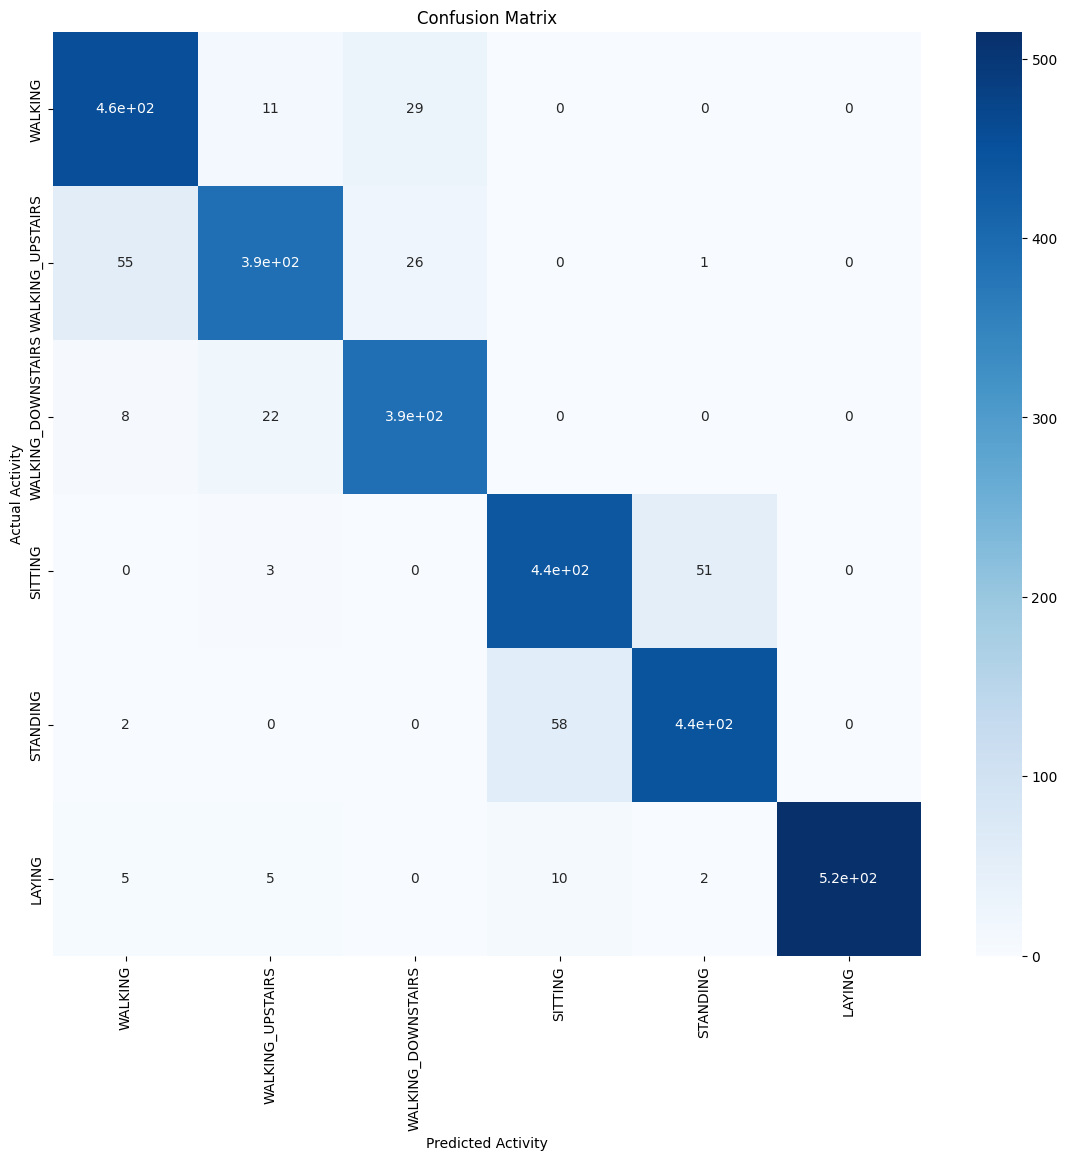

Accuracy Score: 90.1302%
Precision Score: 90.0778%
Recall Score: 90.0599%
F_1 Score: 90.0031%


In [131]:
y_true = np.argmax(y_test, axis=1).reshape(-1,1)
# Show results
# Note: Needed slice test data to 25 and onwards to match predictions due to time step in model
results_summarizer(y_true, y_pred)